In [1]:
!git clone https://github.com/chenchenhou/Image-Editing-In-Fashion-Industry.git
!git clone https://github.com/GiilDe/turbo-edit.git
!pip install bitsandbytes transformers accelerate peft -q

Cloning into 'Image-Editing-In-Fashion-Industry'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 49 (delta 11), reused 43 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 32.32 KiB | 16.16 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Cloning into 'turbo-edit'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 42 (delta 12), reused 28 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 1.36 MiB | 31.56 MiB/s, done.
Resolving deltas: 100% (12/12), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 19.6 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/huggingface/diffusers.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/train_text_to_image_lora_sdxl.py

--2024-11-13 16:09:58--  https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/train_text_to_image_lora_sdxl.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55573 (54K) [text/plain]
Saving to: ‘train_text_to_image_lora_sdxl.py’

train_text_to_image 100%[===================>]  54.27K  --.-KB/s    in 0.001s  

2024-11-13 16:09:58 (44.8 MB/s) - ‘train_text_to_image_lora_sdxl.py’ saved [55573/55573]



In [4]:
%cd Image-Editing-In-Fashion-Industry

/content/Image-Editing-In-Fashion-Industry


In [5]:
!mkdir data
!cp /content/drive/MyDrive/VLR/Final_Project/data/fintuning_data.json ./data/
# !cp /content/drive/MyDrive/VLR/Final_Project/data/editing_data.json ./data/
!cp /content/drive/MyDrive/VLR/Final_Project/data/images.zip ./data/
%cd data
!unzip images.zip
%cd ..
%cd ..
!rm -rf /content/Image-Editing-In-Fashion-Industry/data/__MACOSX

Streaming output truncated to the last 5000 lines.
  inflating: images/image57444.jpg   
  inflating: __MACOSX/images/._image57444.jpg  
  inflating: images/image8347.jpg    
  inflating: __MACOSX/images/._image8347.jpg  
  inflating: images/image66841.jpg   
  inflating: __MACOSX/images/._image66841.jpg  
  inflating: images/image58777.jpg   
  inflating: __MACOSX/images/._image58777.jpg  
  inflating: images/image77794.jpg   
  inflating: __MACOSX/images/._image77794.jpg  
  inflating: images/image20814.jpg   
  inflating: __MACOSX/images/._image20814.jpg  
  inflating: images/image40138.jpg   
  inflating: __MACOSX/images/._image40138.jpg  
  inflating: images/image115177.jpg  
  inflating: __MACOSX/images/._image115177.jpg  
  inflating: images/image112618.jpg  
  inflating: __MACOSX/images/._image112618.jpg  
  inflating: images/image47657.jpg   
  inflating: __MACOSX/images/._image47657.jpg  
  inflating: images/image79961.jpg   
  inflating: __MACOSX/images/._image79961.jpg  
  

In [6]:
!cp /content/drive/MyDrive/VLR/Final_Project/train_text_to_image_sdxl.py /content/

In [7]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [8]:
import json
import os

train_data_dir = "/content/Image-Editing-In-Fashion-Industry/data"  # Update with your path

# Load the JSON file
with open(os.path.join(train_data_dir, 'fintuning_data.json'), 'r') as f:
    data = json.load(f)

# Update image paths to absolute paths
for entry in data:
    image_name = entry['image'].split('/')[-1]
    entry['image'] = os.path.join(train_data_dir, "images", image_name)
    entry['text'] = entry.pop('description')

# Save the updated JSON file
with open(os.path.join(train_data_dir, 'finetune_data_updated.json'), 'w') as f:
    json.dump(data, f, indent=4)


In [9]:
from huggingface_hub import notebook_login

notebook_login()

In [10]:
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [14]:
!pip install -U datasets==2.16.0

In [11]:
from datasets import load_dataset

ds = load_dataset("lambdalabs/naruto-blip-captions")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json:   0%|          | 0.00/897 [00:00<?, ?B/s]

(…)-00000-of-00002-12944970063701d5.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

(…)-00001-of-00002-cefa2f480689f147.parquet:   0%|          | 0.00/357M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1221 [00:00<?, ? examples/s]

In [12]:
from datasets import Dataset, DatasetDict, Image
import json

# Load your JSON data
with open('/content/Image-Editing-In-Fashion-Industry/data/finetune_data_updated.json', 'r') as f:
    data = json.load(f)

# Create a Dataset
dataset = Dataset.from_list(data)

# Create a DatasetDict with a 'train' split
dataset_dict = DatasetDict({'train': dataset})

# Cast the 'image' column to Image type
dataset_dict = dataset_dict.cast_column('image', Image())

# Save the DatasetDict to disk
dataset_dict.save_to_disk('fashion_dataset')



Saving the dataset (0/2 shards):   0%|          | 0/118116 [00:00<?, ? examples/s]

In [13]:
from datasets import load_from_disk
my_data = load_from_disk("/content/fashion_dataset")

In [14]:
my_data.column_names

{'train': ['image', 'text']}

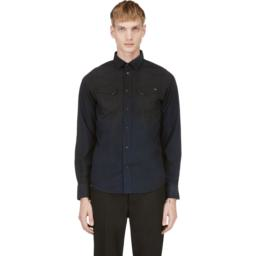

In [23]:
my_data['image'][0]

In [15]:
# !export MODEL_NAME="stabilityai/sdxl-turbo"
# !export VAE_NAME="stabilityai/sdxl-vae"
# !export DATASET_NAME="/content/Image-Editing-In-Fashion-Industry/data"

!accelerate launch train_text_to_image_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/sdxl-turbo" \
  --pretrained_vae_model_name_or_path="stabilityai/sdxl-vae" \
  --dataset_name="/content/fashion_dataset" \
  --image_column="image" \
  --caption_column="text" \
  --max_train_samples 30000 \
  --resolution=512 \
  --random_flip \
  --proportion_empty_prompts=0.2 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --max_train_steps=1000 \
  --use_8bit_adam \
  --learning_rate=1e-06 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --mixed_precision="fp16" \
  --report_to="wandb" \
  --validation_prompt="full pose of jeans for women. skinny-fit jeans in indigo. turquoise overdye effect throughout. five-pocket styling. logo flag and black leather trim at coin pocket. distressing at front. leather logo patch at back waistband in grey. tonal stitching. zip-fly." \
  --validation_epochs 5 \
  --checkpointing_steps=500 \
  --output_dir="/content/drive/MyDrive/VLR/Final_Project/sdxl-turbo-fashion-model"

2024-11-13 16:14:08.240882: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 16:14:08.256169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-13 16:14:08.276752: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-13 16:14:08.283119: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 16:14:08.298657: I tensorflow/core/platform/cpu_feature_guar

In [19]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForImage2Image.from_pretrained("/content/drive/MyDrive/VLR/Final_Project/sdxl-turbo-fashion-model", torch_dtype=torch.float16)
pipe.to("cuda")

init_image = load_image("/content/test.png").resize((512, 512))

prompt = "full pose of jeans for women. skinny-fit jeans in indigo. turquoise overdye effect throughout. five-pocket styling. logo flag and black leather trim at coin pocket. distressing at front. leather logo patch at back waistband in grey. tonal stitching. zip-fly."

image = pipe(prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0).images[0]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

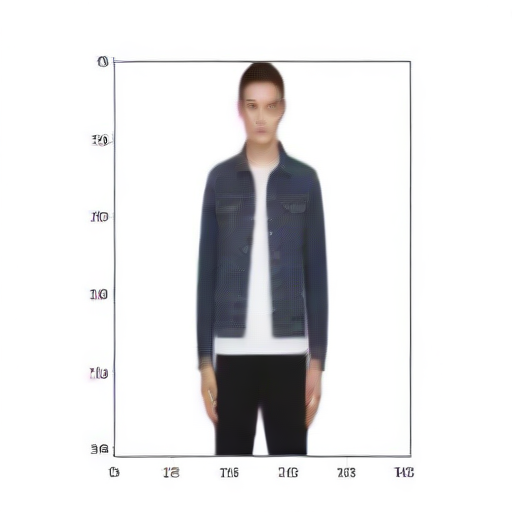

In [20]:
image